# Analyse Cifar100 runs using Adam optimizer with various batch sizes
## Time to get to accuracy 0.6 on DL server

In [1]:
%matplotlib inline
import re
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import itertools
from matplotlib import cm
import pandas as pd
import subprocess
import os

In [2]:
logdir="logs/flextime/0_6x100/02_Adam/experiment02"

In [3]:
!ls logs/flextime/0_6x100/02_Adam/experiment02

cifar_adam_flextime_b1024.log cifar_adam_flextime_b384.log
cifar_adam_flextime_b128.log  cifar_adam_flextime_b48.log
cifar_adam_flextime_b1280.log cifar_adam_flextime_b512.log
cifar_adam_flextime_b1536.log cifar_adam_flextime_b64.log
cifar_adam_flextime_b16.log   cifar_adam_flextime_b640.log
cifar_adam_flextime_b24.log   cifar_adam_flextime_b768.log
cifar_adam_flextime_b256.log  cifar_adam_flextime_b8.log
cifar_adam_flextime_b32.log   cifar_adam_flextime_b80.log


In [4]:
filename_pattern=re.compile(r"cifar_.*\.log")

In [5]:
files=[]
comm = "ls -1 "+logdir
proc = subprocess.Popen(comm.split(" "),
                     stdout=subprocess.PIPE,stderr=subprocess.STDOUT)
for line in iter(proc.stdout.readline,b''):
    m = filename_pattern.match(line)
    if m:
        files.append(os.path.abspath(os.path.join(logdir,line)))

In [6]:
batch_pattern = re.compile(r"^b\s*(\d+)")
output_pattern = re.compile(r"^(\d+)\s+([0-9\.]+)\s+([0-9\.]+)\s+([0-9\.]+)\s+([0-9\.]+)\s+([0-9\.]+)")

In [7]:
remove_str="[J"
def readfile(filename,debug=False):
    filename = filename.strip(" \n")
    with open(filename,"r") as f:
        lines = f.readlines()
        batch = 0
        epoch = 0    
        run = 0
        loss = 0
        acc = 0
        time = 0
        df = pd.DataFrame(data=None,columns=["batch","loss","acc","time","epochs"])
        for line in lines:
            s = line.strip('\n')
            s = s.replace(remove_str,"")
            #if debug: print line[:75]
            m = batch_pattern.match(s)        
            if m:
                batch = int(m.group(1))       
                epoch = 0
                run += 1
                if debug: print "New run with:",batch
            else:
                m = output_pattern.match(s)
                if m:
                    epoch = int(m.group(1))                    
                    loss = float(m.group(3))
                    acc = float(m.group(5))
                    time = float(m.group(6))
                    ls = [batch,loss,acc,time,epoch]
                    s = pd.Series([batch,loss,acc,time,epoch], index=["batch","loss","acc","time","epochs"])
                    #if debug: print s.T
                    df = df.append(s,ignore_index=True)
    if debug: print df
    return df

In [8]:
df = pd.DataFrame(data=None,columns=["batch","loss","acc","time","epochs"])
for file in files:
#print files[2]
    df1 = readfile(file)
    #print df1.head()
    if len(df1) > 0:
        df = pd.concat([df,df1],ignore_index=True)
df.iloc[60:70]

,batch,loss,acc,time,epochs
50,1024.0,1.85138,0.563686,1194.8600,51.0
51,1024.0,1.83088,0.569206,1218.2300,52.0
52,1024.0,1.87086,0.554739,1241.1300,53.0
53,1024.0,1.76206,0.577394,1264.5000,54.0
54,1024.0,1.72085,0.577597,1287.8700,55.0
55,1024.0,1.78970,0.567299,1311.2100,56.0
56,1024.0,1.83183,0.571600,1334.5600,57.0
57,1024.0,1.73784,0.579600,1357.9000,58.0
58,1024.0,1.77363,0.574488,1380.7800,59.0
59,1024.0,1.75224,0.583833,1404.1300,60.0


[array([ 1.,  1.,  1.,  1.]), array([ 0.95177717,  0.95177717,  0.84885557,  1.        ]), array([ 0.89952666,  0.88367147,  0.68979371,  1.        ]), array([ 0.84559416,  0.75047792,  0.61781376,  1.        ]), array([ 0.78631943,  0.58267765,  0.53381702,  1.        ]), array([ 0.67469858,  0.4368583 ,  0.4368583 ,  1.        ]), array([ 0.48111588,  0.30673833,  0.30673833,  1.        ]), array([ 0.1178,  0.    ,  0.    ,  1.    ]), array([ 0.050383,  0.029803,  0.527975,  1.      ]), array([ 0.32515 ,  0.006915,  0.639512,  1.      ]), array([ 0.546157,  0.038954,  0.64701 ,  1.      ]), array([ 0.723444,  0.196158,  0.538981,  1.      ]), array([ 0.85975 ,  0.360588,  0.406917,  1.      ]), array([ 0.95547 ,  0.533093,  0.28549 ,  1.      ]), array([ 0.994495,  0.74088 ,  0.166335,  1.      ]), array([ 0.940015,  0.975158,  0.131326,  1.      ])]


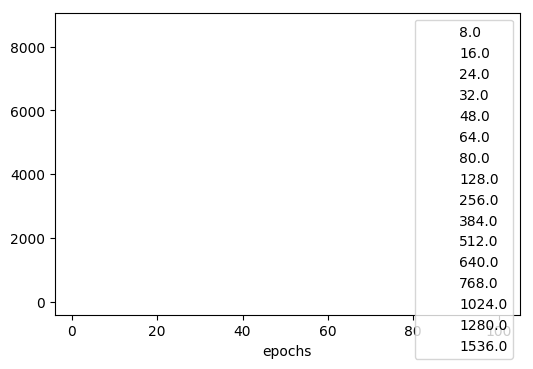

In [57]:
df_batches = df.copy()
df_batches.set_index("epochs",inplace=True)
df_batches.groupby(by="batch")["time"].plot(legend=True,color=colors)
print colors

[array([ 1.,  1.,  1.,  1.]), array([ 0.95177717,  0.95177717,  0.84885557,  1.        ]), array([ 0.89952666,  0.88367147,  0.68979371,  1.        ]), array([ 0.84559416,  0.75047792,  0.61781376,  1.        ]), array([ 0.78631943,  0.58267765,  0.53381702,  1.        ]), array([ 0.67469858,  0.4368583 ,  0.4368583 ,  1.        ]), array([ 0.48111588,  0.30673833,  0.30673833,  1.        ]), array([ 0.1178,  0.    ,  0.    ,  1.    ]), array([ 0.050383,  0.029803,  0.527975,  1.      ]), array([ 0.32515 ,  0.006915,  0.639512,  1.      ]), array([ 0.546157,  0.038954,  0.64701 ,  1.      ]), array([ 0.723444,  0.196158,  0.538981,  1.      ]), array([ 0.85975 ,  0.360588,  0.406917,  1.      ]), array([ 0.95547 ,  0.533093,  0.28549 ,  1.      ]), array([ 0.994495,  0.74088 ,  0.166335,  1.      ]), array([ 0.940015,  0.975158,  0.131326,  1.      ])]


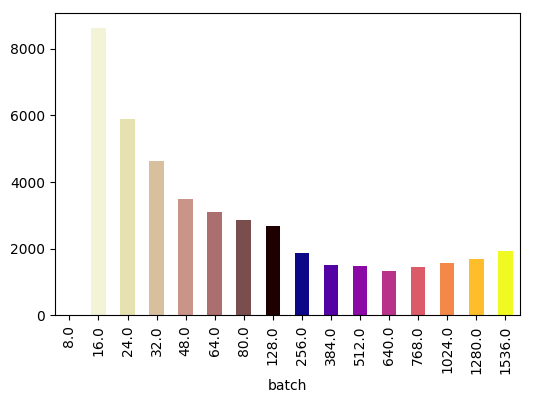

In [58]:
df.groupby(by="batch")["time"].max().plot(kind="bar",color=colors)
print colors

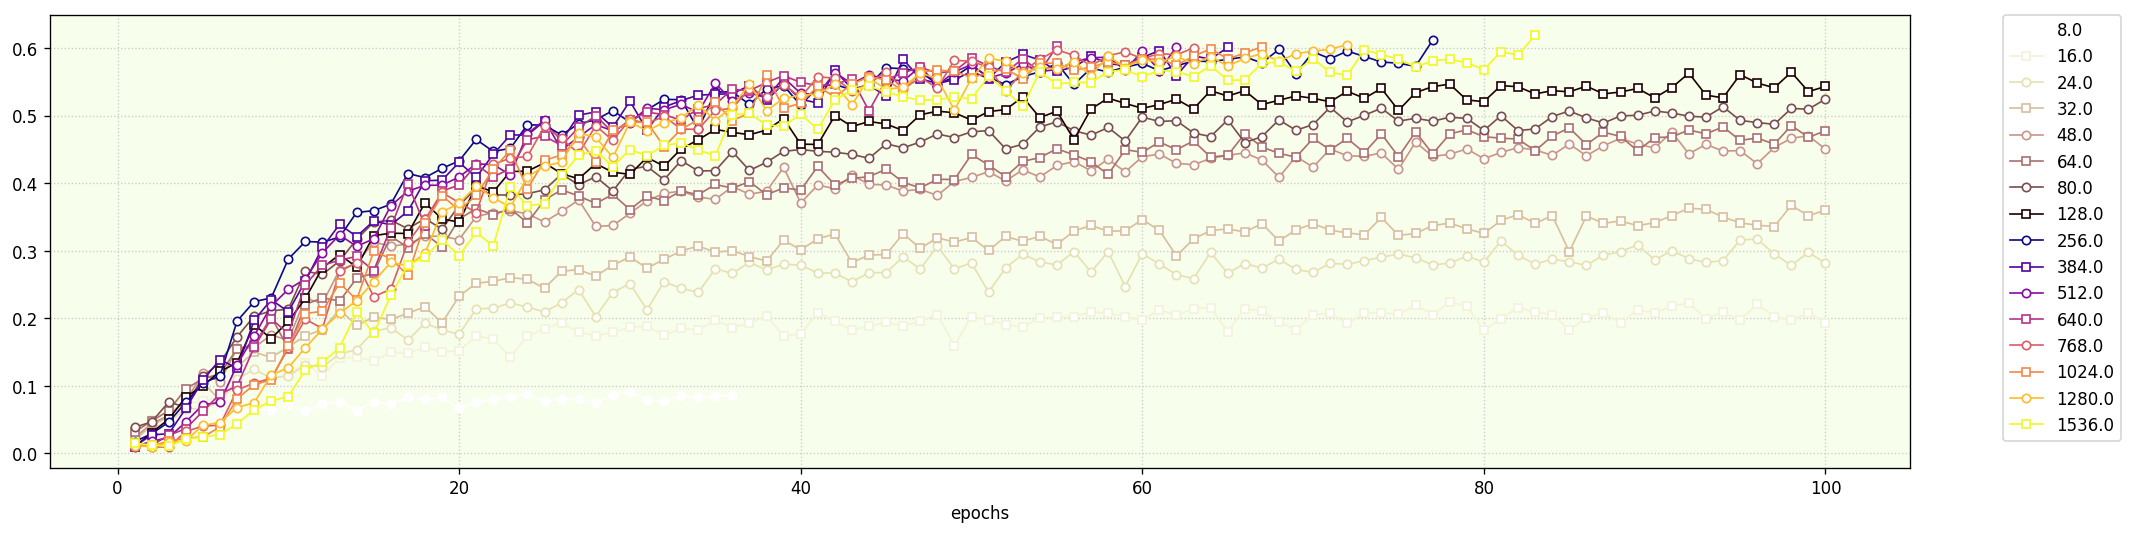

In [62]:
marker_style = dict(markersize=5, markerfacecolor='w')
#plt.rc('axes', prop_cycle=(matplotlib.cycler('linestyle', ['-'])))
plt.rc('axes', prop_cycle=(matplotlib.cycler('marker', ['o', 's'])))
colors=itertools.chain(iter(cm.pink_r(np.linspace(0,1,8))),iter(cm.plasma(np.linspace(0,1,8))))
fig,ax = plt.subplots(figsize=(20,5),dpi=120)
df.pivot(index="epochs", columns="batch", values="acc").plot(ax=ax,linewidth=1, fillstyle='full',
                                                             color=colors, **marker_style)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., )
plt.grid(linestyle=":",color="#cccccc")
axs = fig.axes[0]
axs.set_facecolor("#F7FEEB")

ValueError: Invalid color argument: ''

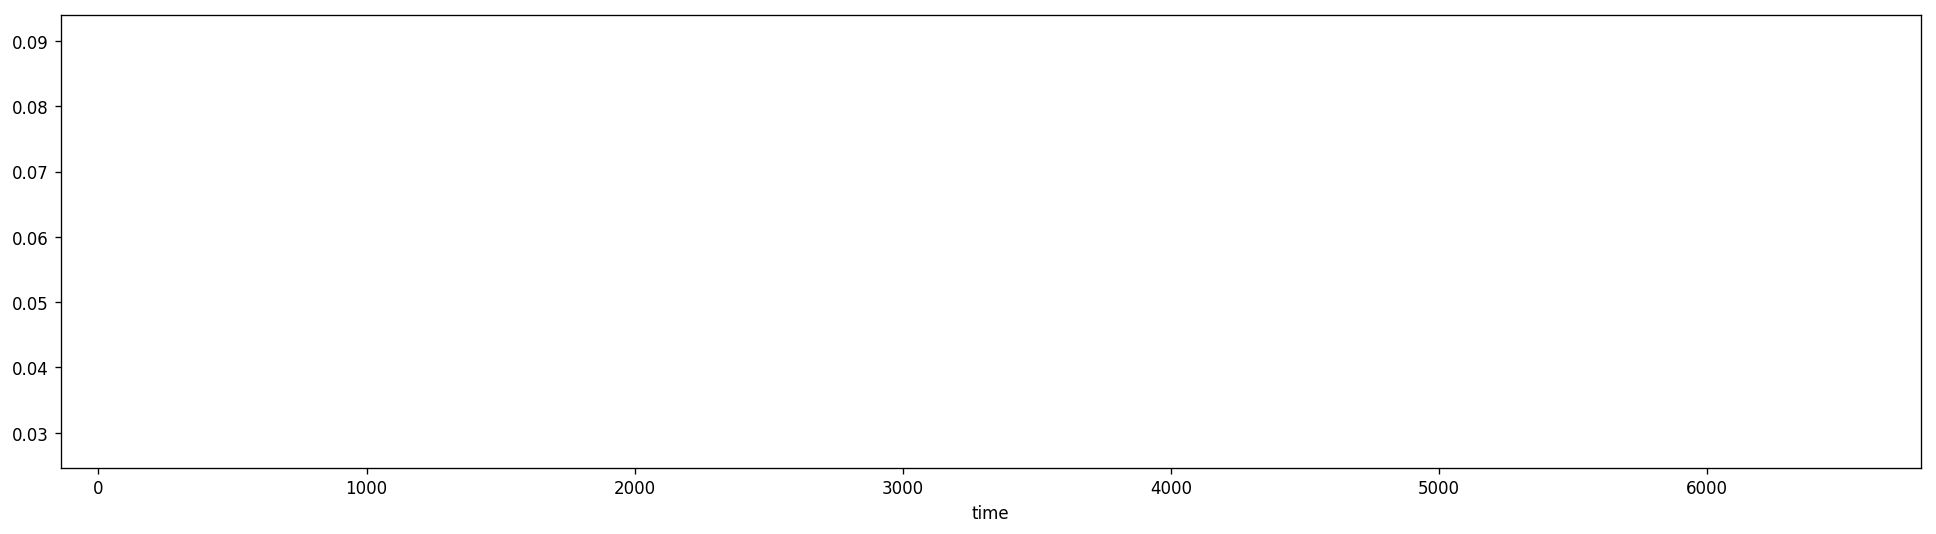

In [65]:
marker_style = dict(markersize=5, markerfacecolor='w')
#plt.rc('axes', prop_cycle=(matplotlib.cycler('linestyle', ['-'])))
plt.rc('axes', prop_cycle=(matplotlib.cycler('marker', ['o', 's'])))
colors=itertools.chain(iter(cm.pink_r(np.linspace(0,1,8))),iter(cm.plasma(np.linspace(0,1,8))))
fig,ax = plt.subplots(figsize=(20,5),dpi=120)
df_times = df.copy()
df_times.set_index("time",inplace=True)
df_times.pivot(columns="batch",values="acc")
colors=itertools.chain(iter(cm.pink_r(np.linspace(0,1,8))),iter(cm.plasma(np.linspace(0,1,8))))
df_times.groupby(by="batch")["acc"].plot(ax=ax,linewidth=1, fillstyle='full',
                                                             color=colors, **marker_style)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid(linestyle=":",color="#cccccc")
axs = fig.axes[0]
axs.set_facecolor("#F7FEEB")

In [ ]:
df_batches = df.copy()
df_batches.set_index("epochs",inplace=True)
df_batches.groupby(by="batch")["acc"].plot(legend=True)

In [ ]:
loss_df = df_reach[['batch','loss']]
acc_df = df[['batch','acc']]
time_df = df_reach[['batch','time']]
epoch_df = df_reach[['batch','epochs']]

In [ ]:
time_df = df_reach[['batch','time']]
time_df.sort_values(by="batch").plot(kind="bar",x="batch")

In [ ]:
loss_df.sort_values(by="batch").plot(kind="bar",x="batch")

In [ ]:
acc_df.sort_values(by="batch").plot(kind="bar",x="batch")

In [ ]:
df.head()

In [11]:
print(plt.style.available)

[u'seaborn-darkgrid', u'Solarize_Light2', u'seaborn-notebook', u'classic', u'seaborn-ticks', u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', u'ggplot', u'fivethirtyeight', u'_classic_test', u'seaborn-colorblind', u'seaborn-deep', u'seaborn-whitegrid', u'seaborn-bright', u'seaborn-poster', u'seaborn-muted', u'seaborn-paper', u'seaborn-white', u'fast', u'seaborn-pastel', u'seaborn-dark', u'seaborn', u'seaborn-dark-palette']


In [34]:
print plt.style.library['Solarize_Light2']

axes.axisbelow: True
axes.edgecolor: #eee8d5
axes.facecolor: #eee8d5
axes.grid: True
axes.labelcolor: #657b83
axes.labelsize: 12.0
axes.prop_cycle: cycler(u'color', [u'#268BD2', u'#2AA198', u'#859900', u'#B58900', u'#CB4B16', u'#DC322F', u'#D33682', u'#6C71C4'])
axes.titlesize: 16.0
figure.facecolor: #FDF6E3
grid.color: #fdf6e3
grid.linestyle: -
grid.linewidth: 1.0
lines.linewidth: 2.0
lines.solid_capstyle: butt
patch.antialiased: True
xtick.color: #657b83
xtick.direction: out
ytick.color: #657b83
ytick.direction: out


In [12]:
print matplotlib.lines.Line2D.fillStyles

(u'full', u'left', u'right', u'bottom', u'top', u'none')
